In [98]:
%%capture
!pip install rdkit-pypi

In [99]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

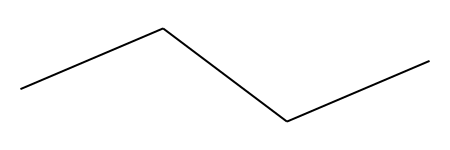

In [100]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [101]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [102]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

In [103]:
logp = Descriptors.MolLogP(mol)
logp

1.8064

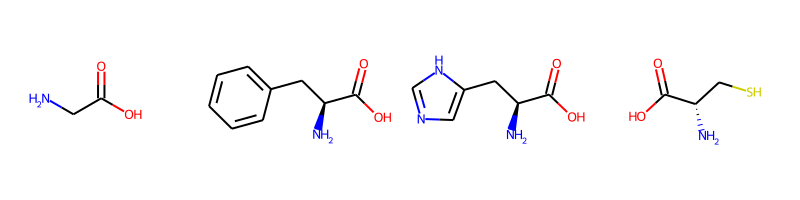

In [104]:
smiles_list = ['C(C(=O)O)N', 'C1=CC=C(C=C1)C[C@@H](C(=O)O)N', 'C1=C(NC=N1)C[C@@H](C(=O)O)N', 'C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

In [105]:
pattern = Chem.MolFromSmiles('S') # Has sulfur
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

False
False
False
True


In [17]:
pattern = Chem.MolFromSmiles('C(=O)O') # Has carboxyl group
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

True
True
True
True


In [18]:
pattern = Chem.MolFromSmiles('CC(N)C') # Has ??? group, what's this?
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

False
True
True
True


In [19]:
pattern = Chem.MolFromSmarts('[r]') # Has ring
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

False
True
True
False


In [20]:
pattern = Chem.MolFromSmarts('[r5]') # Has 5-membered ring
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

False
False
True
False


For interesting drug molecules, see https://go.drugbank.com/drugs/DB14761

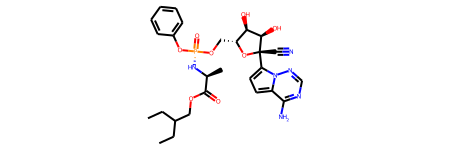

In [23]:
mol = Chem.MolFromSmiles('CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@](C#N)([C@H](O)[C@@H]1O)C1=CC=C2N1N=CN=C2N)OC1=CC=CC=C1')
mol

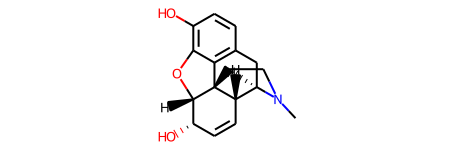

In [27]:
# Download from drugbank
import requests

morphine_url = 'https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol'
morphine_mol = requests.get(morphine_url).text
morphine = Chem.MolFromMolBlock(morphine_mol)
morphine

In [28]:
morphine.GetNumAtoms() # Heavy atoms

21

In [37]:
morphine.GetAtoms()

In [39]:
[atom.GetSymbol() for atom in morphine.GetAtoms()] # Get all heavy atoms in molecule

['O',
 'O',
 'O',
 'N',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

In [40]:
[atom.GetSymbol() for atom in morphine.GetAtoms() if not atom.IsInRing()] # Filter

['O', 'O', 'C']

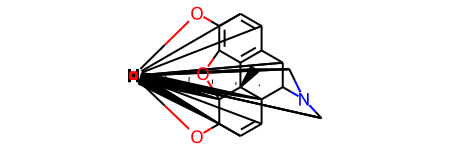

In [43]:
morphine_with_hydrogens = Chem.AddHs(morphine)
morphine_with_hydrogens

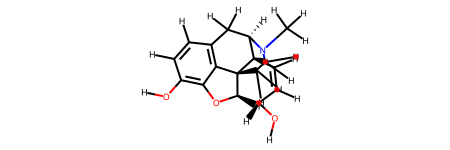

In [44]:
AllChem.Compute2DCoords(morphine_with_hydrogens)
morphine_with_hydrogens

Use descriptors (fingerprints)

In [45]:
Descriptors.MolWt(morphine)

285.34299999999996

In [46]:
Descriptors.MolLogP(morphine) # Predicted value, compare with experimental value online

1.1980999999999997

In [47]:
Descriptors.NumRotatableBonds(morphine)

0

In [50]:
Chem.Descriptors3D.Asphericity(morphine)

0.2748067328818591